In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../06machin_learning/data/Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Embarked']]
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [5]:
data['family'] = data['SibSp'] + data['Parch']

/tmp/ipykernel_75403/3785938369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['family'] = data['SibSp'] + data['Parch']


In [6]:
data = data.drop(['SibSp','Parch'],axis=1)
data

,Survived,Pclass,Sex,Age,Embarked,family
0,0,3,male,22.0,S,1
1,1,1,female,38.0,C,1
2,1,3,female,26.0,S,0
3,1,1,female,35.0,S,1
4,0,3,male,35.0,S,0
...,...,...,...,...,...,...
886,0,2,male,27.0,S,0
887,1,1,female,19.0,S,0
888,0,3,female,NaN,S,3
889,1,1,male,26.0,C,0


In [7]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [8]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Embarked  891 non-null    object 
 5   family    891 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


In [10]:
X = data.drop("Survived",axis=1)
y = data['Survived']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

# 딥러닝시에도 데이터의 스케일을 맞춰 주는것이 좋다.
* StandardScaler, MinMaxScaler를 주로 사용, 이상값이 많을 경우 RobustScaler를 사용
* 이진분류(0,1): MinMaxScaler
* 연속값예측: StandardScaler

In [13]:
cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns
print(cat_cols)
print(num_cols)

Index(['Sex', 'Embarked'], dtype='object')
Index(['Pclass', 'Age', 'family'], dtype='object')


In [14]:
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [15]:
ohe = OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False)
ohe.fit(X_train[cat_cols])
ohe_X_train =  ohe.transform(X_train[cat_cols])
ohe_X_test =  ohe.transform(X_test[cat_cols])
ohe_X_train_df = pd.DataFrame(ohe_X_train,columns=ohe.get_feature_names_out(),index=X_train.index)
ohe_X_test_df = pd.DataFrame(ohe_X_test,columns=ohe.get_feature_names_out(),index=X_test.index)

In [16]:
ohe_X_test_df

,Sex_male,Embarked_Q,Embarked_S
625,1.0,0.0,1.0
566,1.0,0.0,1.0
459,1.0,1.0,0.0
804,1.0,0.0,1.0
338,1.0,0.0,1.0
...,...,...,...
184,0.0,0.0,1.0
607,1.0,0.0,1.0
624,1.0,0.0,1.0
103,1.0,0.0,1.0


In [17]:
mms = MinMaxScaler()
mms.fit(X_train[num_cols])
mms_X_train = mms.transform(X_train[num_cols])
mms_X_test = mms.transform(X_test[num_cols])
mms_X_train_df = pd.DataFrame(mms_X_train,columns=X_train[num_cols].columns,index=X_train.index)
mms_X_test_df = pd.DataFrame(mms_X_test,columns=X_test[num_cols].columns,index=X_test.index)
mms_X_train_df

,Pclass,Age,family
748,0.0,0.233476,0.1
45,1.0,0.367921,0.0
28,1.0,0.367921,0.0
633,0.0,0.367921,0.0
403,1.0,0.346569,0.1
...,...,...,...
476,0.5,0.421965,0.1
190,0.5,0.396833,0.0
736,1.0,0.597889,0.4
462,0.0,0.585323,0.0


In [18]:
X_train_df = pd.concat([mms_X_train_df,ohe_X_train_df],axis=1)
X_test_df = pd.concat([mms_X_test_df,ohe_X_test_df],axis=1)

In [19]:
X_test_df

,Pclass,Age,family,Sex_male,Embarked_Q,Embarked_S
625,0.0,0.761247,0.0,1.0,0.0,1.0
566,1.0,0.233476,0.0,1.0,0.0,1.0
459,1.0,0.367921,0.0,1.0,1.0,0.0
804,1.0,0.334004,0.0,1.0,0.0,1.0
338,1.0,0.560191,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...
184,1.0,0.044986,0.2,0.0,0.0,1.0
607,0.0,0.334004,0.0,1.0,0.0,1.0
624,1.0,0.258608,0.0,1.0,0.0,1.0
103,1.0,0.409399,0.0,1.0,0.0,1.0


# Tensorflow Sequential API를 사용한 순차적 모델 생성 및 분석
* Sequential: 인공신경망을 순차적으로 작성할 때 사용
* Dense: 층, 레이어
* 1. 신경망 모델 정의
* 2. 신경망 모델 훈련
* 3. 훈련된 모델로 테스트
* 4. 검증

* 입력층은 반드시 독립변수의수(input_dim)를 정확히 지정
* 신경망 모델의 은닉층은 2~3개 정도로 한다.
* Dense의 노드수는 2의 배수의 지정 2 4 8 16 256
* Dense의 노드는 큰 수에서 작은 수로 줄여나간다.
* 은닉층의 활성화 함수: Relu
* 출력층은 이진분류일 경우 sigmoid, 다중분류일 경우 softmax
* 회귀분석일 경우(종속변수가 연속형(수치형)인 경우) 출력층에 활성화 함수 없이 노드를 1로 지정

In [20]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-12-03 14:08:04.305434: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-03 14:08:04.457283: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-03 14:08:09.049379: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [21]:
X_train_df.shape[1]

6

In [22]:
# 신경망 모델 정의 keras 3.0, tensroflow 2.19 기준
model = Sequential()
model.add(Input(shape=(X_train_df.shape[1],))) # 입력층
model.add(Dense(64,activation='relu')) # 은닉층
model.add(Dense(32,activation='relu')) # 은닉층
model.add(Dense(16,activation='relu'))  # 은닉층
model.add(Dense(1,activation='sigmoid')) # 출력층

I0000 00:00:1764738491.465992   75403 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


# 모델의 파라미터 세팅 model.compile()
* loss: 오차 계산 지표
    * 이진분류: binary_crossentropy
    * 다중분류: categorical_crossentropy - y가 one-hot encoding
    * 데이터에 0이 많은 희소행렬인 경우: sparse_categorical_crossentropy - y label encoding
    * 연속형데이터(회귀분석): mse
* optimizer: learning_rate
    * adam을 가장 많이 사용
* metrics: 평가지표 accuracy

In [23]:
# 모델의 파라미터 세팅
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 훈련 model.fit(X_train, y_train)
* epochs: 전체 데이터를 한 번 훈련하는 주기, 10-100 사이
* batch_size: 전체 데이터를 쪼개서 훈련, 데이터의 묶음, 메모리에 맞춰서 크기 조절(2의 배수) 32, 64로 쪼개서 넣는 것 추천
* validation_data: 검증 데이터로 모델 검증 실시

In [24]:
len(X_train_df)

623

In [25]:
history = model.fit(X_train_df,y_train,epochs=100, 
                    batch_size=16, validation_data=(X_test_df,y_test))

Epoch 1/100


2025-12-03 14:08:14.074686: I external/local_xla/xla/service/service.cc:163] XLA service 0x7efd2c00b3c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-03 14:08:14.074770: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-12-03 14:08:14.105217: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-03 14:08:14.338124: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600


21/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5598 - loss: 0.6903

I0000 00:00:1764738495.307721   75446 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


39/39 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.6404 - loss: 0.6530 - val_accuracy: 0.6754 - val_loss: 0.6141
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7095 - loss: 0.5742 - val_accuracy: 0.7836 - val_loss: 0.5386
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7897 - loss: 0.5065 - val_accuracy: 0.7761 - val_loss: 0.4949
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.4763 - val_accuracy: 0.8134 - val_loss: 0.4763
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7994 - loss: 0.4598 - val_accuracy: 0.7799 - val_loss: 0.4634
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7945 - loss: 0.4550 - val_accuracy: 0.8022 - val_loss: 0.4534
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8042 - loss: 0.4463 - val_accuracy: 0.8172 - val_loss: 0.4466
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8042 - loss: 0.4414 - val_accuracy: 0.8134 - val_loss: 0.

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8299 - loss: 0.3974 - val_accuracy: 0.8134 - val_loss: 0.4243
Epoch 52/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8379 - loss: 0.3978 - val_accuracy: 0.8172 - val_loss: 0.4239
Epoch 53/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8363 - loss: 0.3944 - val_accuracy: 0.8060 - val_loss: 0.4248
Epoch 54/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8331 - loss: 0.3931 - val_accuracy: 0.7836 - val_loss: 0.4383
Epoch 55/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8443 - loss: 0.3965 - val_accuracy: 0.8246 - val_loss: 0.4279
Epoch 56/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8443 - loss: 0.3991 - val_accuracy: 0.8284 - val_loss: 0.4299
Epoch 57/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8379 - loss: 0.3957 - val_accuracy: 0.8134 - val_loss: 0.4245
Epoch 58/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8459 - loss: 0.3900 - val_accuracy: 0.8284 - val_lo

# 딥러닝 모델 성능 평가
* 딥러닝에서 모델의 성능을 평가하는 지표는 loss
* 보통 loss가 낮으면 accuracy가 올라가지만 비례하지 않을 때도 있음.
* accuracy와 loss 간의 차이가 있을 때 loss가 낮은 모델이 우수한 모델

In [26]:
score = model.evaluate(X_test_df,y_test)
print('test_loss: ', score[0])
print('test_accuracy: ',score[1])

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8060 - loss: 0.4443  
test_loss:  0.44433069229125977
test_accuracy:  0.8059701323509216


In [27]:
for i in history.history:
    print(f"{i}: ",history.history[i])

accuracy:  [0.6404494643211365, 0.7094703316688538, 0.7897271513938904, 0.7865168452262878, 0.7993579506874084, 0.7945425510406494, 0.8041733503341675, 0.8041733503341675, 0.8041733503341675, 0.8138041496276855, 0.812199056148529, 0.8105939030647278, 0.8202247023582458, 0.8041733503341675, 0.8138041496276855, 0.8154093027114868, 0.8170144557952881, 0.8186196088790894, 0.812199056148529, 0.8282504081726074, 0.8250401020050049, 0.8234350085258484, 0.8202247023582458, 0.8202247023582458, 0.8266452550888062, 0.8314606547355652, 0.8314606547355652, 0.8346709609031677, 0.8298555612564087, 0.8266452550888062, 0.8298555612564087, 0.8282504081726074, 0.8314606547355652, 0.8266452550888062, 0.8378812074661255, 0.8346709609031677, 0.8378812074661255, 0.8330658078193665, 0.8298555612564087, 0.8362760543823242, 0.8298555612564087, 0.8330658078193665, 0.8346709609031677, 0.8298555612564087, 0.8346709609031677, 0.8362760543823242, 0.8346709609031677, 0.8346709609031677, 0.8426966071128845, 0.83146065

In [28]:
import matplotlib.pyplot as plt

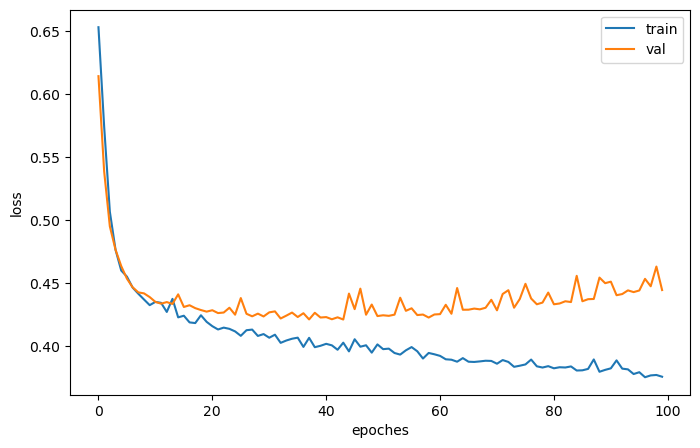

In [29]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()

# 모델의 예측값 출력
* 딥러닝의 결과는 확률로 나온다.

In [30]:
pred = model.predict(X_test_df)
pred

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


array([[0.26979545],
       [0.10435106],
       [0.10713344],
       [0.10306262],
       [0.07505523],
       [0.3630515 ],
       [0.11103223],
       [0.7854248 ],
       [0.10178984],
       [0.969829  ],
       [0.7204378 ],
       [0.99350125],
       [0.30172545],
       [0.27030614],
       [0.8339236 ],
       [0.7214154 ],
       [0.10713344],
       [0.303515  ],
       [0.93655354],
       [0.2680072 ],
       [0.06777734],
       [0.08240225],
       [0.47009772],
       [0.10306262],
       [0.16522658],
       [0.11305426],
       [0.976976  ],
       [0.2582015 ],
       [0.14989397],
       [0.2122262 ],
       [0.8762831 ],
       [0.91524756],
       [0.10713344],
       [0.7544567 ],
       [0.98163706],
       [0.4493618 ],
       [0.10713344],
       [0.0783122 ],
       [0.10713344],
       [0.28105307],
       [0.11103223],
       [0.9272665 ],
       [0.42763013],
       [0.98305506],
       [0.971285  ],
       [0.1123613 ],
       [0.3605372 ],
       [0.178

In [31]:
result = pd.DataFrame(dict(y_test=y_test,pred=pred[:,0]))
result

,y_test,pred
625,0,0.269795
566,0,0.104351
459,0,0.107133
804,1,0.103063
338,1,0.075055
...,...,...
184,1,0.715207
607,1,0.266969
624,0,0.104028
103,0,0.097291


In [32]:
result['pred'] = result['pred'].apply(lambda x: 1 if x > 0.5 else 0)
result

,y_test,pred
625,0,0
566,0,0
459,0,0
804,1,0
338,1,0
...,...,...
184,1,1
607,1,0
624,0,0
103,0,0


In [33]:
from sklearn.metrics import classification_report
print(classification_report(result['y_test'],result['pred']))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       165
           1       0.82      0.63      0.71       103

    accuracy                           0.81       268
   macro avg       0.81      0.77      0.78       268
weighted avg       0.81      0.81      0.80       268



In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dtc = DecisionTreeClassifier(max_depth=3,random_state=42)
dtc.fit(X_train_df,y_train)
pred2 = dtc.predict(X_test_df)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



# Functional API를 이용한 함수형 모델 
-> 테이블+이미지 같이 주로사용함
* Sequential API는 단순히 층을 여러 개 쌓는 형태라 복잡한 모델 생성에 한계가 있음.
* Functional  API는 입력층과 출력층을 사용자가 직접 정의 가능
* 다중입력(Multi-input), 다중출력(Multi-output)등 복잡한 모델을 정의 할 수 있음.
* Input(shape=(독립변수 수))로 입력층 정의
* 이전 층을 다음 층의 입력으로 사용
* model()에 입력과 출력을 정의

In [36]:
from keras.layers import Input,Dense
from keras.models import Model

In [37]:
# model = Sequential()
# model.add(Input(shape=(X_train_df.shape[1],))) # 입력층
# model.add(Dense(64,activation='relu')) # 은닉층
# model.add(Dense(32,activation='relu')) # 은닉층
# model.add(Dense(16,activation='relu'))  # 은닉층
# model.add(Dense(1,activation='sigmoid')) # 출력층

In [38]:
# 입력층
inputs = Input(shape=(X_train_df.shape[1],))

# 은닉층
x =Dense(64,activation='relu')(inputs)
x =Dense(32,activation='relu')(x)
x =Dense(16,activation='relu')(x)

# 출력층
outputs = Dense(1,activation='sigmoid')(x)

# 모델 정의
model2 = Model(inputs=inputs,outputs=outputs)
model2.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7063 - loss: 0.6700 - val_accuracy: 0.7612 - val_loss: 0.6436
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7608 - loss: 0.6186 - val_accuracy: 0.7761 - val_loss: 0.5903
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7657 - loss: 0.5598 - val_accuracy: 0.7649 - val_loss: 0.5300
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7865 - loss: 0.5039 - val_accuracy: 0.7761 - val_loss: 0.4916
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7881 - loss: 0.4768 - val_accuracy: 0.7761 - val_loss: 0.4783
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7865 - loss: 0.4637 - val_accuracy: 0.7836 - val_loss: 0.4636
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7913 - loss: 0.4562 - val_accuracy: 0.7836 - val_loss: 0.4581
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8042 - loss: 0.4473 - val_accuracy: 0.7873 - 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8347 - loss: 0.3979 - val_accuracy: 0.8060 - val_loss: 0.4200
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8363 - loss: 0.3972 - val_accuracy: 0.8134 - val_loss: 0.4183
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8250 - loss: 0.3965 - val_accuracy: 0.7910 - val_loss: 0.4322
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8379 - loss: 0.3985 - val_accuracy: 0.8060 - val_loss: 0.4183
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8283 - loss: 0.3996 - val_accuracy: 0.8209 - val_loss: 0.4180
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8347 - loss: 0.3979 - val_accuracy: 0.8097 - val_loss: 0.4191
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8395 - loss: 0.3966 - val_accuracy: 0.8060 - val_loss: 0.4178
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8379 - loss: 0.3942 - val_accuracy: 0.8097 - val_lo

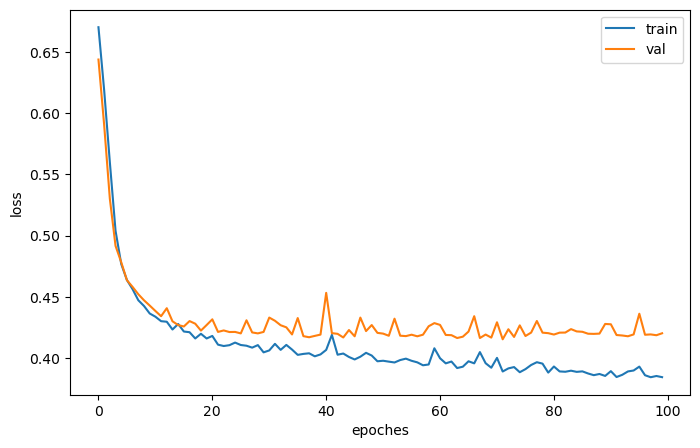

In [39]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2 = model2.fit(X_train_df,y_train,epochs=100,batch_size=32,validation_data=(X_test_df,y_test))
pred2 = model2.predict(X_test_df)
pred2 = pd.DataFrame(pred2)
pred2 = pred2[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test,pred2))
plt.figure(figsize=(8,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()

# Class형으로 만들기 (Model Subclass API)
* class 형태의 모델 정의 방법
* keras의 Model을 상속 받아서 작성

In [40]:
from keras.layers import Input,Dense
from keras.models import Model

In [41]:
class Titanic(Model):
    def __init__(self):
        super(Titanic,self).__init__()
        self.dense1 = Dense(128,activation='relu')
        self.dense2 = Dense(64,activation='relu')
        self.dense3 = Dense(32,activation='relu')
        self.dense4 = Dense(16,activation='relu')
        self.classifier = Dense(1,activation='sigmoid')
        
    def call(self,inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.dense4(x)
        return self.classifier(x)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.6533 - loss: 0.6552 - val_accuracy: 0.7239 - val_loss: 0.6075
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7624 - loss: 0.5635 - val_accuracy: 0.7985 - val_loss: 0.5245
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7817 - loss: 0.5040 - val_accuracy: 0.7761 - val_loss: 0.4938
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7994 - loss: 0.4821 - val_accuracy: 0.8172 - val_loss: 0.4719
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8058 - loss: 0.4629 - val_accuracy: 0.8022 - val_loss: 0.4527
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8058 - loss: 0.4488 - val_accuracy: 0.8172 - val_loss: 0.4445
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8058 - loss: 0.4451 - val_accuracy: 0.7873 - val_loss: 0.4482
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8138 - loss: 0.4381 - val_accuracy: 0.7873 - 

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8379 - loss: 0.3902 - val_accuracy: 0.8097 - val_loss: 0.4275
Epoch 52/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8347 - loss: 0.3925 - val_accuracy: 0.8060 - val_loss: 0.4311
Epoch 53/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8363 - loss: 0.3890 - val_accuracy: 0.7948 - val_loss: 0.4554
Epoch 54/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8411 - loss: 0.3882 - val_accuracy: 0.8172 - val_loss: 0.4310
Epoch 55/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8315 - loss: 0.3897 - val_accuracy: 0.8022 - val_loss: 0.4372
Epoch 56/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8411 - loss: 0.3951 - val_accuracy: 0.7761 - val_loss: 0.4509
Epoch 57/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8395 - loss: 0.3870 - val_accuracy: 0.8134 - val_loss: 0.4356
Epoch 58/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8347 - loss: 0.3844 - val_accuracy: 0.8022 - val_lo

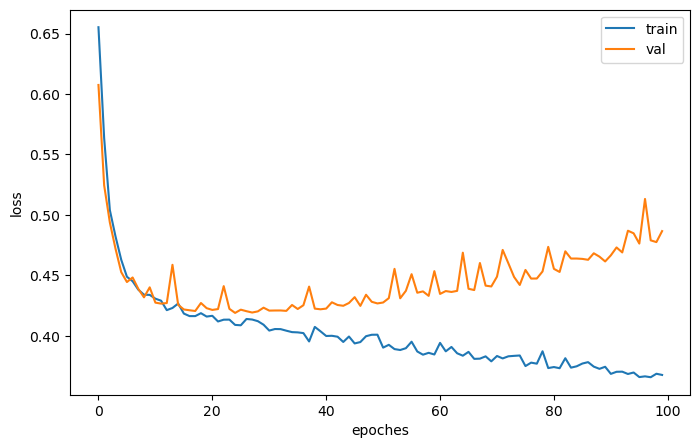

In [42]:
model3 = Titanic()
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history3 = model3.fit(X_train_df,y_train,epochs=100,batch_size=32,validation_data=(X_test_df,y_test))
pred3 = model3.predict(X_test_df)
pred3 = pd.DataFrame(pred3)
pred3 = pred3[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test,pred3))
plt.figure(figsize=(8,5))
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel("loss")
plt.legend(['train','val'])
plt.show()